<a href="https://colab.research.google.com/github/munnurumahesh03-coder/machine_learning_for_regression/blob/main/AdaBoost_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AdaBoost**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
medical_charges_url = 'messy_regression_dataset_20k.csv'

In [ ]:
medic_df = pd.read_csv(medical_charges_url)

In [ ]:
medic_df

,age,bmi,children,smoker,region,charges
0,56.0,25.457487,NaN,no,unknown,10611.599579
1,69.0,33.020537,0.0,YES,northeast,8859.172448
2,46.0,21.914141,3.0,no,NaN,7428.800879
3,32.0,31.731564,NaN,no,northwest,11515.330480
4,60.0,26.849758,0.0,NaN,northeast,5051.955748
...,...,...,...,...,...,...
19995,41.0,26.225017,2.0,NaN,southeast,8427.582262
19996,51.0,36.264055,0.0,no,southwest,13299.557047
19997,25.0,30.035071,NaN,no,southwest,7287.692750
19998,61.0,26.106643,2.0,no,southwest,13269.658318


# **Exploratory Data Analysis**

---



In [ ]:
medic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       18514 non-null  object 
 1   bmi       18389 non-null  float64
 2   children  17802 non-null  float64
 3   smoker    12943 non-null  object 
 4   region    18382 non-null  object 
 5   charges   18874 non-null  float64
dtypes: float64(3), object(3)
memory usage: 937.6+ KB


In [ ]:
medic_df.describe()

,bmi,children,charges
count,18389.000000,17802.000000,18874.000000
mean,30.023139,2.000899,10000.479531
std,4.968658,1.416515,2508.054122
min,10.387999,0.000000,556.900591
25%,26.644991,1.000000,8300.698129
50%,30.037319,2.000000,9997.044815
75%,33.377548,3.000000,11686.585621
max,52.395421,4.000000,19650.222798


In [ ]:
medic_df.isnull().sum()

,0
age,1486
bmi,1611
children,2198
smoker,7057
region,1618
charges,1126


In [ ]:
# Try to convert 'age' to a number. Values that can't be converted will become NaN.
original_age_dtype = medic_df['age'].dtype
medic_df['age'] = pd.to_numeric(medic_df['age'], errors='coerce')

# Find the rows where the conversion failed (i.e., where 'age' is now NaN but wasn't before)
# This isn't a perfect way to see the original bad values, but it confirms the issue.

# A better way: Let's see how many new NaNs were created
new_nan_count = medic_df['age'].isnull().sum()
print(f"The 'age' column now has {new_nan_count} total missing values.")

print("\nNew info for the 'age' column:")
medic_df.info()

The 'age' column now has 1686 total missing values.

New info for the 'age' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       18314 non-null  float64
 1   bmi       18389 non-null  float64
 2   children  17802 non-null  float64
 3   smoker    12943 non-null  object 
 4   region    18382 non-null  object 
 5   charges   18874 non-null  float64
dtypes: float64(4), object(2)
memory usage: 937.6+ KB


In [ ]:
medic_df.describe()

,age,bmi,children,charges
count,18314.000000,18389.000000,17802.000000,18874.000000
mean,48.516436,30.023139,2.000899,10000.479531
std,17.878012,4.968658,1.416515,2508.054122
min,18.000000,10.387999,0.000000,556.900591
25%,33.000000,26.644991,1.000000,8300.698129
50%,48.000000,30.037319,2.000000,9997.044815
75%,64.000000,33.377548,3.000000,11686.585621
max,79.000000,52.395421,4.000000,19650.222798


In [ ]:
medic_df.dropna(subset=['charges'],inplace=True)

In [ ]:
medic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18874 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       17288 non-null  float64
 1   bmi       17347 non-null  float64
 2   children  16814 non-null  float64
 3   smoker    12185 non-null  object 
 4   region    17336 non-null  object 
 5   charges   18874 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.0+ MB


# **Visualization**

---



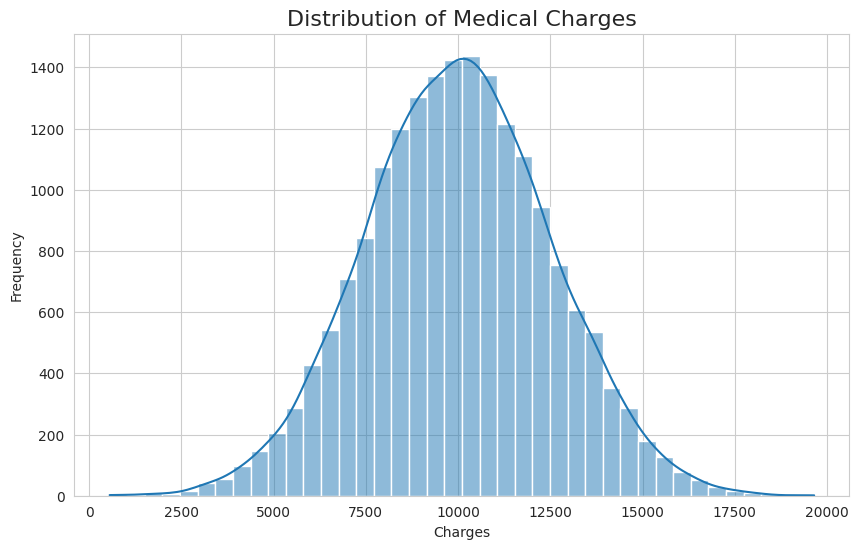

In [ ]:
# Set the plotting style
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=medic_df, x='charges', kde=True, bins=40)
plt.title('Distribution of Medical Charges', fontsize=16)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# First, let's see the unique values to confirm the issue
print("Original unique values in 'smoker' column:")
print(medic_df['smoker'].unique())

# Now, let's clean the column
# We will replace all variations of 'yes' with 'yes' and all variations of 'no' with 'no'
medic_df['smoker'] = medic_df['smoker'].replace({
    'YES': 'yes',
    'Nope': 'no'
})

# Let's check the unique values again to confirm it's fixed
print("\nCleaned unique values in 'smoker' column:")
print(medic_df['smoker'].unique())

Original unique values in 'smoker' column:
['no' 'YES' nan 'yes' 'Nope']

Cleaned unique values in 'smoker' column:
['no' 'yes' nan]


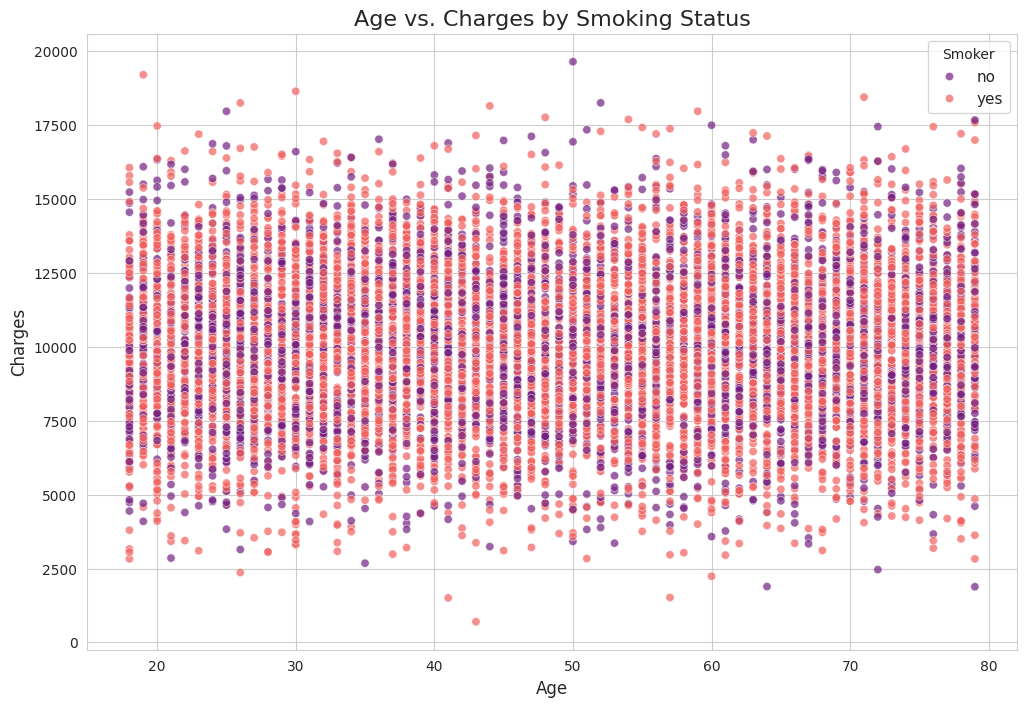

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=medic_df, x='age', y='charges', hue='smoker', alpha=0.7, palette='magma')
plt.title('Age vs. Charges by Smoking Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.legend(title='Smoker', fontsize=11)
plt.show()

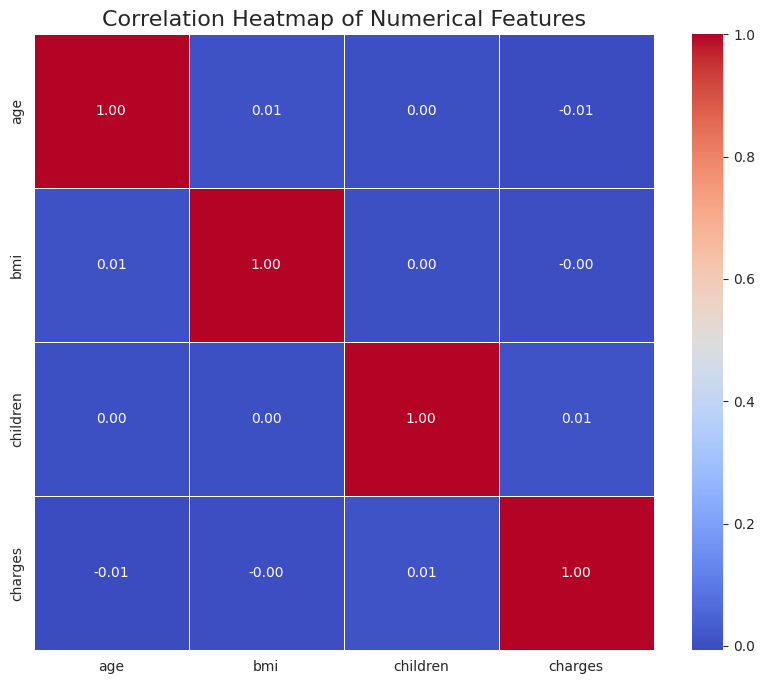

In [ ]:
# First, create a correlation matrix
# We will only use the numeric columns for this
numeric_cols = medic_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

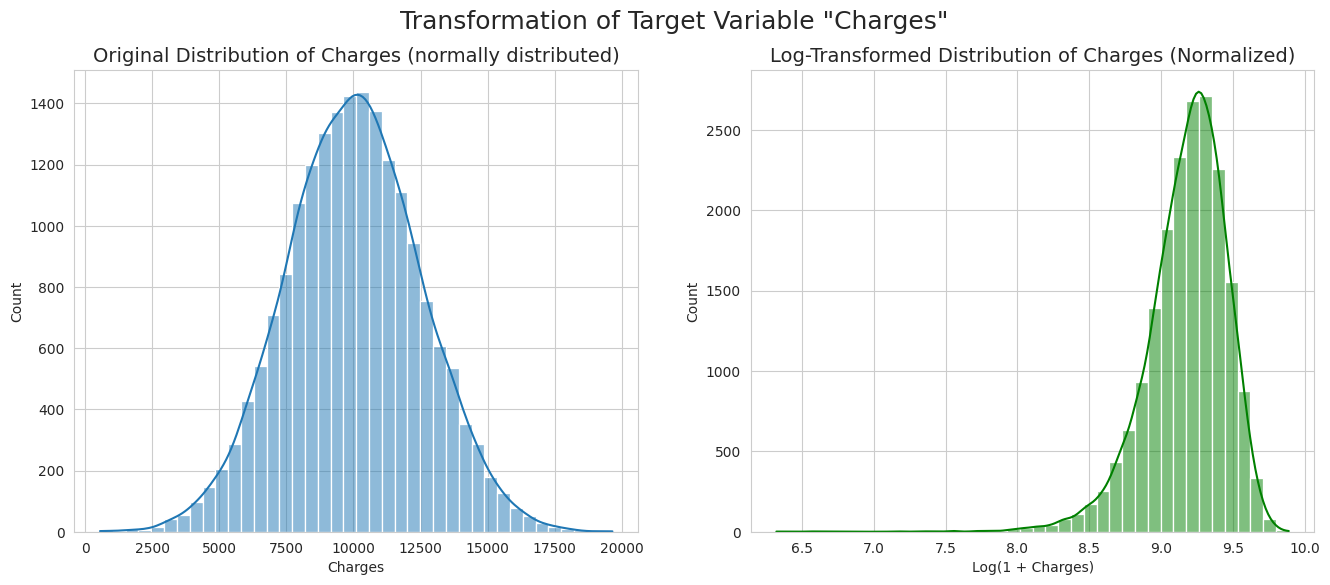

In [ ]:
# Set the plotting style
sns.set_style('whitegrid')

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Original Distribution of Charges
sns.histplot(data=medic_df, x='charges', kde=True, ax=axes[0], bins=40)
axes[0].set_title('Original Distribution of Charges (normally distributed)', fontsize=14)
axes[0].set_xlabel('Charges')

# Plot 2: Log-Transformed Distribution of Charges
# We apply the log transform directly in the plotting call for this visualization
log_charges = np.log1p(medic_df['charges'].dropna()) # dropna() for visualization
sns.histplot(log_charges, kde=True, ax=axes[1], bins=40, color='green')
axes[1].set_title('Log-Transformed Distribution of Charges (Normalized)', fontsize=14)
axes[1].set_xlabel('Log(1 + Charges)')

plt.suptitle('Transformation of Target Variable "Charges"', fontsize=18)
plt.show()

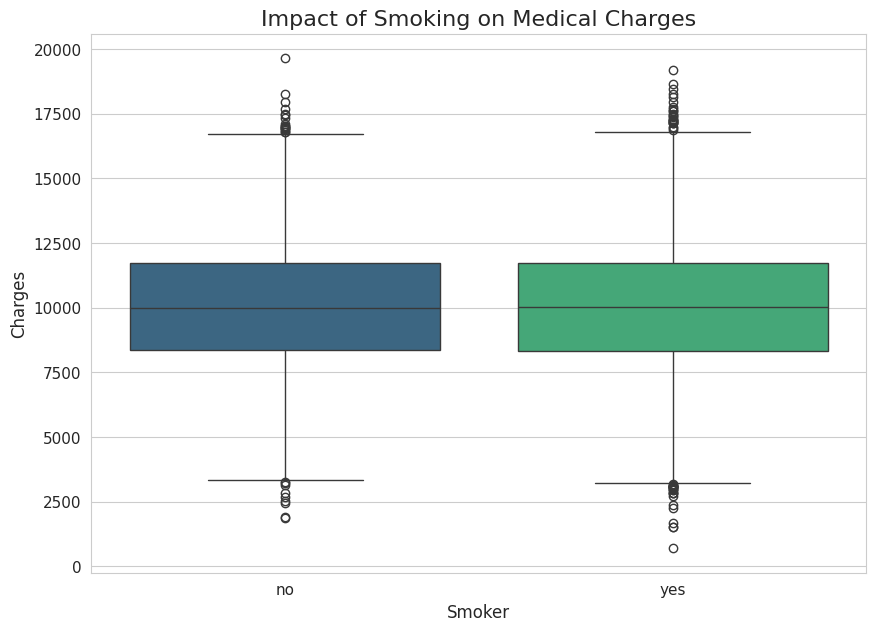

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=medic_df, x='smoker', y='charges', palette='viridis')
plt.title('Impact of Smoking on Medical Charges', fontsize=16)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

# **Feature Engineering**

---



In [ ]:
df_engineered = medic_df.copy()

In [ ]:
df_engineered['charges'] = np.log1p(df_engineered['charges'])
print("'charges' column has been log-transformed.")

'charges' column has been log-transformed.


In [ ]:
df_engineered['is_smoker'] = df_engineered['smoker'].str.lower().map({'yes': 1}).fillna(0).astype(int)
print("'is_smoker' binary feature created.")

'is_smoker' binary feature created.


In [ ]:
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']
df_engineered['bmi_category'] = pd.cut(df_engineered['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)
print("'bmi_category' feature created.")

'bmi_category' feature created.


In [ ]:
df_engineered = df_engineered.drop(columns=['smoker'])
print("Original 'smoker' column dropped.")

Original 'smoker' column dropped.


In [ ]:
print("\n--- Feature Engineering Complete! ---")
print("The DataFrame is now ready for splitting.")
print("\nUpdated DataFrame head:")
df_engineered.head()


--- Feature Engineering Complete! ---
The DataFrame is now ready for splitting.

Updated DataFrame head:


,age,bmi,children,region,charges,is_smoker,bmi_category
0,56.0,25.457487,NaN,unknown,9.269797,0,Overweight
1,69.0,33.020537,0.0,northeast,9.089322,1,Obese
2,46.0,21.914141,3.0,NaN,8.913254,0,Healthy
3,32.0,31.731564,NaN,northwest,9.351521,0,Obese
4,60.0,26.849758,0.0,northeast,8.527729,0,Overweight


In [ ]:
df_engineered.describe()

,age,bmi,children,charges,is_smoker
count,17288.000000,17347.000000,16814.000000,18874.000000,18874.000000
mean,48.523427,30.020216,2.005115,9.175182,0.423440
std,17.865768,4.959569,1.416935,0.277874,0.494117
min,18.000000,10.387999,0.000000,6.324181,0.000000
25%,33.000000,26.620603,1.000000,9.024215,0.000000
50%,48.000000,30.035766,2.000000,9.210145,0.000000
75%,64.000000,33.381963,3.000000,9.366282,1.000000
max,79.000000,52.395421,4.000000,9.885895,1.000000


# **Train Test Split**

---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(df_engineered, test_size=0.2, random_state=42)

In [ ]:
train_df, val_df = train_test_split(train_val_df,test_size=0.2,random_state=42)

In [ ]:
print("---------- Data Split Complete ----------")
print(f"Training_set_shape: {train_df.shape}")
print(f"Validation_set_shape: {val_df.shape}")
print(f"Testing_set_shape: {test_df.shape}")

---------- Data Split Complete ----------
Training_set_shape: (12079, 7)
Validation_set_shape: (3020, 7)
Testing_set_shape: (3775, 7)


# **Input and Target Columns**

---



In [ ]:
target_column = 'charges'

In [ ]:
X_train = train_df.drop(columns=[target_column]).copy()
y_train = train_df[target_column].copy()

In [ ]:
X_train

,age,bmi,children,region,is_smoker,bmi_category
3646,20.0,20.819974,4.0,northeast,0,Healthy
466,23.0,42.929876,0.0,southwest,1,Obese
10162,41.0,29.386143,4.0,northwest,0,Overweight
14490,48.0,28.479795,1.0,southwest,1,Overweight
12454,74.0,24.427464,0.0,unknown,1,Healthy
...,...,...,...,...,...,...
16946,19.0,24.360719,0.0,NaN,0,Healthy
7435,42.0,39.005226,NaN,northeast,1,Obese
1417,62.0,28.867363,1.0,unknown,0,Overweight
13067,75.0,26.678595,NaN,northeast,0,Overweight


In [ ]:
y_train

,charges
3646,9.451659
466,9.229449
10162,8.943451
14490,9.291505
12454,9.003493
...,...
16946,9.228927
7435,8.786578
1417,9.189870
13067,9.275411


In [ ]:
X_val = val_df.drop(columns=[target_column]).copy()
y_val = val_df[target_column].copy()

In [ ]:
X_val

,age,bmi,children,region,is_smoker,bmi_category
16680,76.0,29.871624,1.0,NaN,1,Overweight
17690,34.0,27.633944,3.0,NaN,1,Overweight
4783,22.0,24.575160,3.0,northeast,0,Healthy
11366,36.0,21.596102,2.0,northeast,0,Healthy
14092,31.0,33.812553,1.0,unknown,0,Obese
...,...,...,...,...,...,...
456,21.0,39.679305,0.0,southeast,0,Obese
11809,NaN,NaN,0.0,southwest,0,NaN
6386,64.0,31.595604,2.0,southwest,0,Obese
12192,67.0,37.178700,4.0,northwest,1,Obese


In [ ]:
y_val

,charges
16680,9.481014
17690,9.240936
4783,8.977266
11366,9.107897
14092,8.657220
...,...
456,9.327615
11809,9.100854
6386,9.533569
12192,9.550142


In [ ]:
X_test = test_df.drop(columns=target_column).copy()
y_test = test_df[target_column].copy()

In [ ]:
X_test

,age,bmi,children,region,is_smoker,bmi_category
14634,47.0,37.549972,0.0,northeast,1,Obese
5921,77.0,26.370410,2.0,southeast,1,Overweight
43,33.0,28.736876,NaN,northeast,1,Overweight
14450,55.0,27.677657,4.0,northwest,0,Overweight
16005,57.0,33.888202,1.0,northwest,1,Obese
...,...,...,...,...,...,...
1007,66.0,28.044218,2.0,southeast,0,Overweight
13748,34.0,34.619872,1.0,northeast,1,Obese
4652,60.0,25.117872,0.0,unknown,0,Overweight
8285,NaN,35.592707,NaN,northwest,1,Obese


In [ ]:
y_test

,charges
14634,8.720637
5921,9.226468
43,8.977354
14450,9.171982
16005,9.644838
...,...
1007,9.446024
13748,8.876026
4652,7.383367
8285,9.338097


In [ ]:
print("---------- Input and Target Columns Split Complete ----------")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

---------- Input and Target Columns Split Complete ----------
X_train shape: (12079, 6)
y_train shape: (12079,)


In [ ]:
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_val shape: (3020, 6)
y_val shape: (3020,)


In [ ]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_test shape: (3775, 6)
y_test shape: (3775,)


In [ ]:
print("\n Columns in X_train:")
print(X_train.columns.tolist())


 Columns in X_train:
['age', 'bmi', 'children', 'region', 'is_smoker', 'bmi_category']


# **Pipeline**

---



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import AdaBoostRegressor

# --- Phase 2: Pipelined Modeling ---

# Step 1: Identify numerical and categorical columns from the training set (X_train)
# This ensures we build the pipeline based on the training data only.
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()

# As per our established workflow, 'is_smoker' is treated as a categorical feature
# even though it's encoded as a number. We move it to the correct list.
if 'is_smoker' in numerical_features:
    numerical_features.remove('is_smoker')
    categorical_features.append('is_smoker')

print(f"Identified Numerical columns: {numerical_features}")
print(f"Identified Categorical columns: {categorical_features}")


# Step 2: Create the preprocessing pipelines for both numerical and categorical data
# This is the same robust preprocessing strategy used for all previous models.

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Using median is robust to outliers
    ('scaler', StandardScaler())                  # Scale features to have zero mean and unit variance
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='unknown')), # Fill missing with the most common value
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')) # Convert categories to binary columns
])


# Step 3: Combine preprocessing steps into a single ColumnTransformer
# This object will apply the correct transformation to each column type.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep any other columns (though we don't have any)
)


# Step 4: Create the final AdaBoost pipeline
# This chains the preprocessor and the AdaBoost regressor into a single, powerful workflow.
ada_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(random_state=42)) # Using default parameters for our baseline model
])


# Step 5: Display the final pipeline to verify its structure
print("\n--- Full AdaBoost Pipeline Created Successfully ---")
ada_pipeline


Identified Numerical columns: ['age', 'bmi', 'children']
Identified Categorical columns: ['region', 'bmi_category', 'is_smoker']

--- Full AdaBoost Pipeline Created Successfully ---


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['region', 'bmi_category',
                                                   'is_smoker'])])),
                ('regressor', AdaBoostRegressor(random_state=42))])

# **AdaBoost Regressor**

---



In [ ]:
from sklearn.metrics import r2_score

print("--- Fitting the baseline AdaBoost model (with default parameters) ---")
ada_pipeline.fit(X_train, y_train)
print("Baseline model fitted successfully.")

--- Fitting the baseline AdaBoost model (with default parameters) ---
Baseline model fitted successfully.


In [ ]:
y_pred_val = ada_pipeline.predict(X_val)

In [ ]:
r2_val_baseline = r2_score(y_val, y_pred_val)

In [ ]:
print(f"\n--- Baseline AdaBoost Performance (Validation Set) ---")
print(f"R-squared (R²): {r2_val_baseline:.4f}")

print("\n--- Comparison ---")
# The official champion from Part 1 is the Tuned ElasticNet.
print("Our current champion (Tuned ElasticNet) had a final test R² of -0.0007.")
print(f"This default AdaBoost model achieved an R² of {r2_val_baseline:.4f}.")

if r2_val_baseline > -0.0007:
    print("\nObservation: This baseline model is already performing better than our current champion! Tuning could yield even better results.")
else:
    print("\nObservation: This baseline is not an improvement, but hyperparameter tuning is the next step to boost performance.")


--- Baseline AdaBoost Performance (Validation Set) ---
R-squared (R²): -0.1080

--- Comparison ---
Our current champion (Tuned ElasticNet) had a final test R² of -0.0007.
This default AdaBoost model achieved an R² of -0.1080.

Observation: This baseline is not an improvement, but hyperparameter tuning is the next step to boost performance.


# **Helper Function**

---



In [201]:
from sklearn.tree import DecisionTreeRegressor # Make sure this is imported

def test_ada_params(params_to_test):
    """
    A corrected helper function to test AdaBoost hyperparameters.
    It correctly handles parameters for both AdaBoost and its base_estimator.
    """
    # --- 1. Separate the parameters ---
    # We'll separate parameters for AdaBoost itself from those for its base_estimator.
    ada_params = {}
    estimator_params = {}

    # Check each parameter. If it's for the tree, store it in estimator_params.
    # Otherwise, it's for AdaBoost itself.
    for key, value in params_to_test.items():
        if key in ['max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features']:
            estimator_params[key] = value
        else:
            ada_params[key] = value

    # --- 2. Create the pipeline with the correct structure ---
    ada_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', AdaBoostRegressor(
            # Create the base estimator with its specific parameters
            estimator=DecisionTreeRegressor(**estimator_params),
            # Pass the AdaBoost-specific parameters
            **ada_params,
            random_state=42
        ))
    ])

    # --- 3. Fit and Score ---
    ada_pipeline.fit(X_train, y_train)
    train_r2 = ada_pipeline.score(X_train, y_train)
    val_r2 = ada_pipeline.score(X_val, y_val)

    # --- 4. Return Results ---
    result = params_to_test.copy()
    result['training_r2'] = train_r2
    result['validation_r2'] = val_r2

    return result


# **HyperParameter Tuning**

---



# **max_depth**

---



In [202]:
max_depth_df = pd.DataFrame(test_ada_params({'max_depth': d}) for d in range(1,11))

display(max_depth_df)

,max_depth,training_r2,validation_r2
0,1,-0.013787,-0.011028
1,2,-0.239056,-0.253353
2,3,-0.088097,-0.108023
3,4,-0.672629,-0.727046
4,5,-0.448141,-0.547112
5,6,-0.203139,-0.332430
6,7,-0.040703,-0.185320
7,8,0.043640,-0.158128
8,9,0.113909,-0.139427
9,10,0.187348,-0.135615


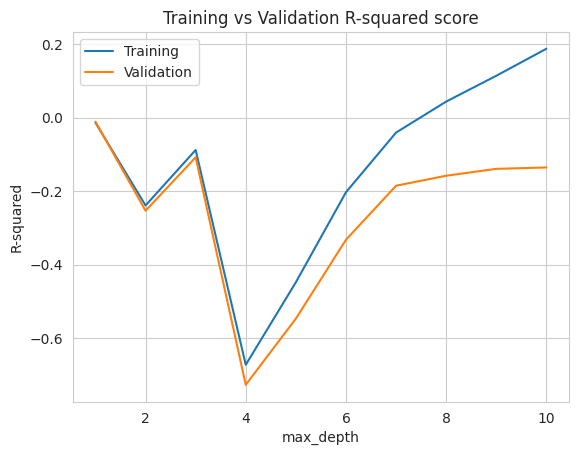

In [206]:
plt.figure()
plt.plot(max_depth_df['max_depth'],max_depth_df['training_r2'])
plt.plot(max_depth_df['max_depth'],max_depth_df['validation_r2'])
plt.title('Training vs Validation R-squared score')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.legend(['Training','Validation'])

# **n_estimators**

---



In [213]:
n_estimators_df = pd.DataFrame(test_ada_params({'n_estimators': n}) for n in [50, 100, 150, 200, 250, 300])

display(n_estimators_df)

,n_estimators,training_r2,validation_r2
0,50,0.973868,-0.233969
1,100,0.918984,-0.196599
2,150,0.872794,-0.208082
3,200,0.832911,-0.204718
4,250,0.802015,-0.208881
5,300,0.776501,-0.210764


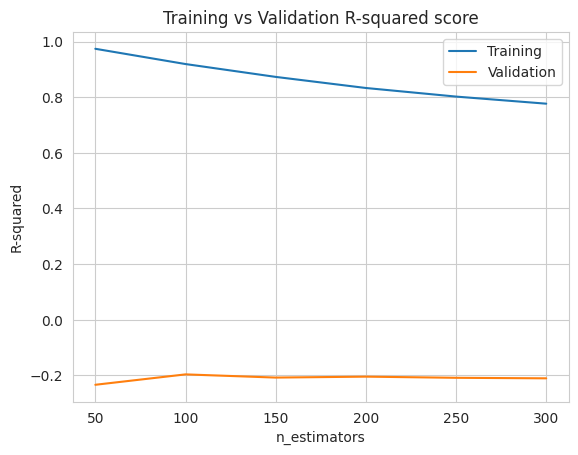

In [211]:
plt.figure()
plt.plot(n_estimators_df['n_estimators'],n_estimators_df['training_r2'])
plt.plot(n_estimators_df['n_estimators'],n_estimators_df['validation_r2'])
plt.title('Training vs Validation R-squared score')
plt.xlabel('n_estimators')
plt.ylabel('R-squared')
plt.legend(['Training','Validation'])

# **Learning_rate**

---



In [214]:
learning_rate_df = pd.DataFrame(test_ada_params({'learning_rate': lr}) for lr in [0.001, 0.01, 0.05, 0.1, 0.5, 1.0])

display(learning_rate_df)

,learning_rate,training_r2,validation_r2
0,0.001,0.986444,-0.230947
1,0.010,0.987542,-0.240609
2,0.050,0.989118,-0.220494
3,0.100,0.989180,-0.226309
4,0.500,0.988444,-0.236619
5,1.000,0.973868,-0.233969


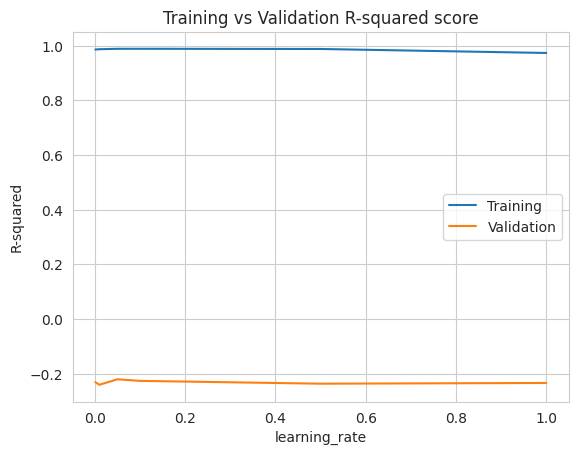

In [215]:
plt.figure()
plt.plot(learning_rate_df['learning_rate'],learning_rate_df['training_r2'])
plt.plot(learning_rate_df['learning_rate'],learning_rate_df['validation_r2'])
plt.title('Training vs Validation R-squared score')
plt.xlabel('learning_rate')
plt.ylabel('R-squared')
plt.legend(['Training','Validation'])

# **Loss**

---



In [216]:
loss_df = pd.DataFrame(test_ada_params({'loss': l}) for l in ['linear', 'square', 'exponential'])

display(loss_df)

,loss,training_r2,validation_r2
0,linear,0.973868,-0.233969
1,square,0.983036,-0.282032
2,exponential,0.976581,-0.219587


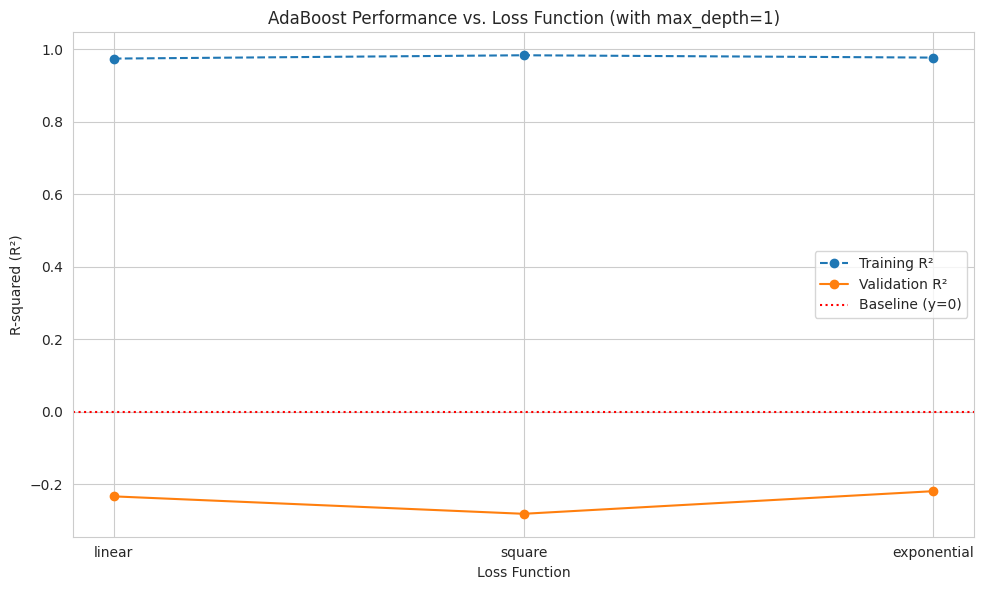

In [218]:
# --- Plotting the results as a Line Plot ---
plt.figure(figsize=(10, 6))

# Plot training and validation R² scores
plt.plot(loss_df['loss'], loss_df['training_r2'], marker='o', linestyle='--', label='Training R²')
plt.plot(loss_df['loss'], loss_df['validation_r2'], marker='o', linestyle='-', label='Validation R²')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle=':', label='Baseline (y=0)')

# Add titles and labels for clarity
plt.title('AdaBoost Performance vs. Loss Function (with max_depth=1)')
plt.xlabel('Loss Function')
plt.ylabel('R-squared (R²)')
plt.grid(True)
plt.legend()

# Ensure the layout is tight and the plot is displayed
plt.tight_layout()
plt.show()


# **RandomizedSearch CV**

---



In [219]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# --- Final Tuning with RandomizedSearchCV for AdaBoost ---

# Step 1: Define the hyperparameter search space (our "lineup").

param_distributions = {
    # We are searching for the best combination of estimators and learning rate.
    'regressor__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
    'regressor__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],

    # We will include all three loss functions, as one might work better with a specific

    'regressor__loss': ['linear', 'square', 'exponential'],

    'regressor__estimator__max_depth': [1]
}

# Step 2: Create the base pipeline for the search.

search_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(
        estimator=DecisionTreeRegressor(),
        random_state=42
    ))
])

# Step 3: Create the RandomizedSearchCV object.
random_search_ada = RandomizedSearchCV(
    estimator=search_pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    cv=3,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 4: Fit the search to the training data.

print("--- Starting RandomizedSearchCV for AdaBoost ---")
print("This will test 100 combinations across 3 folds, for a total of 300 fits.")
random_search_ada.fit(X_train, y_train)
print("\n--- RandomizedSearchCV Complete! ---")

# Step 5: Display the best results found by the search.
print(f"\nBest validation R² score found: {random_search_ada.best_score_:.4f}")
print("\nBest Hyperparameters:")
print(random_search_ada.best_params_)


--- Starting RandomizedSearchCV for AdaBoost ---
This will test 100 combinations across 3 folds, for a total of 300 fits.
Fitting 3 folds for each of 100 candidates, totalling 300 fits

--- RandomizedSearchCV Complete! ---

Best validation R² score found: -0.0002

Best Hyperparameters:
{'regressor__n_estimators': 150, 'regressor__loss': 'square', 'regressor__learning_rate': 0.001, 'regressor__estimator__max_depth': 1}


# **Evaluation and Selection**

---



In [220]:
from sklearn.metrics import r2_score, mean_absolute_error


# --- Phase 3: Evaluation & Selection ---

# Step 1: Get the best model from the RandomizedSearchCV.

final_ada_model = random_search_ada.best_estimator_

print("--- Evaluating the Champion AdaBoost Model on the Test Set ---")

# Step 2: Make predictions on the unseen test data.

y_pred_test = final_ada_model.predict(X_test)

# Step 3: Calculate the final performance metrics on the test set.

r2_test = r2_score(y_test, y_pred_test)


mae_test = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_test))

# Step 4: Display the final, official results.
print("\n--- Official AdaBoost Model Performance (Test Set) ---")
print(f"Final Test R-squared (R²): {r2_test:.4f}")
print(f"Final Test Mean Absolute Error (MAE): ${mae_test:,.2f}")

# Step 5: Compare the test score with the validation score to check for consistency.

print("\n--- Consistency Check ---")
print(f"Validation R² (from RandomizedSearchCV): {random_search_ada.best_score_:.4f}")
print(f"Final Test R² (official score): {r2_test:.4f}")

# Check if the test score is reasonably close to the validation score.
if abs(random_search_ada.best_score_ - r2_test) < 0.05:
    print("\nSuccess: The test score is consistent with the validation score. The model is reliable.")
else:
    print("\nWarning: The test score differs significantly from the validation score. This could indicate overfitting to the validation set.")


--- Evaluating the Champion AdaBoost Model on the Test Set ---

--- Official AdaBoost Model Performance (Test Set) ---
Final Test R-squared (R²): -0.0011
Final Test Mean Absolute Error (MAE): $2,067.59

--- Consistency Check ---
Validation R² (from RandomizedSearchCV): -0.0002
Final Test R² (official score): -0.0011

Success: The test score is consistent with the validation score. The model is reliable.


# **Saving through Joblib**

---



In [221]:
import joblib
import numpy as np

# --- Phase 4: Saving the Final Model ---

# Step 1: The model to be saved is the best estimator found by our search.
# (This variable should already be in your environment from the previous step)
# final_ada_model = random_search_ada.best_estimator_

# Step 2: Define the filename for our saved AdaBoost model.
# We follow the established naming convention.
filename = '06_adaboost_regressor.joblib'

# Step 3: Save the final model pipeline to the file.
print(f"--- Saving the final model to '{filename}' ---")
joblib.dump(final_ada_model, filename)
print("Model saved successfully!")

# Step 4 (Verification): Load the model back and test it on a sample.
# This confirms that the saved file is not corrupt and works as expected.
print(f"\n--- Verifying the saved model ---")
loaded_model = joblib.load(filename)
print("Model loaded successfully.")

# Predict on the first row of the test set to confirm functionality.
sample_data = X_test.iloc[[0]]
prediction = loaded_model.predict(sample_data)

# Reverse the log-transform to see the prediction in the original dollar scale.
predicted_cost = np.expm1(prediction[0])

print(f"Prediction on a sample data point: ${predicted_cost:,.2f}")
print("Verification complete. The saved model is working correctly.")


--- Saving the final model to '06_adaboost_regressor.joblib' ---
Model saved successfully!

--- Verifying the saved model ---
Model loaded successfully.
Prediction on a sample data point: $9,613.09
Verification complete. The saved model is working correctly.


# **Deployment**

---



In [223]:
import gradio as gr

# --- 1. LOAD THE TRAINED ADABOOST MODEL ---
model_filename = '06_adaboost_regressor.joblib'

try:
    loaded_model = joblib.load(model_filename)
    print(f"Model '{model_filename}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: Model file '{model_filename}' not found. The app will not work.")
    loaded_model = None
except Exception as e:
    print(f"An error occurred while loading the model: {e}")
    loaded_model = None


# --- 2. CREATE THE PREDICTION FUNCTION (CORRECTED) ---
# The function signature now includes 'sex'.
def predict_cost(age, sex, bmi, children, region, is_smoker):
    """
    Predicts medical insurance cost based on user inputs using the loaded AdaBoost model.
    The order of arguments must match the 'inputs' list below.
    """
    if loaded_model is None:
        return "ERROR: Model could not be loaded. Please check the file path."

    # --- Feature Engineering Step ---
    if bmi < 18.5:
        bmi_category = 'Underweight'
    elif 18.5 <= bmi < 25:
        bmi_category = 'Healthy'
    elif 25 <= bmi < 30:
        bmi_category = 'Overweight'
    else:
        bmi_category = 'Obese'

    # --- DataFrame Creation  ---

    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'region': [region],
        'is_smoker': [is_smoker],
        'bmi_category': [bmi_category]
    })

    # --- Make the Prediction ---
    predicted_log_cost = loaded_model.predict(input_data)
    predicted_cost = np.expm1(predicted_log_cost[0])

    return f"${predicted_cost:,.2f}"


# --- 3. DEFINE THE GRADIO INTERFACE COMPONENTS (CORRECTED) ---
# A Radio button for 'sex' has been added.
inputs = [
    gr.Slider(minimum=18, maximum=80, value=45, label="Age", info="Your age in years."),
    gr.Radio(choices=['male', 'female'], value='female', label="Sex"), # Added 'sex' input
    gr.Slider(minimum=15, maximum=55, value=30.0, label="BMI", info="Your Body Mass Index."),
    gr.Slider(minimum=0, maximum=5, step=1, value=1, label="Children", info="Number of dependent children."),
    gr.Dropdown(choices=['southwest', 'southeast', 'northwest', 'northeast', 'unknown'], value='northwest', label="Region"),
    gr.Radio(choices=[("Yes", 1), ("No", 0)], value=0, label="Are you a smoker?")
]

output = gr.Textbox(label="Predicted Annual Insurance Cost")


# --- 4. CREATE AND LAUNCH THE APP ---
title = "Medical Insurance Cost Predictor"
description = """
### The "Ultimate Regressor Gauntlet" - Model 06: AdaBoost
This application predicts the estimated annual medical insurance cost using a **Tuned AdaBoost Regressor**.
Enter your details below to see the prediction.
"""

app = gr.Interface(
    fn=predict_cost,
    inputs=inputs,
    outputs=output,
    title=title,
    description=description,
    theme=gr.themes.Soft(),
    allow_flagging='never'
)

app.launch(share=True)


Model '06_adaboost_regressor.joblib' loaded successfully.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e00323a049e7285db9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
